In [74]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
from scipy.cluster.vq import whiten, kmeans2

In [76]:
def call_api(url, result_key):
    json = {}
    json = requests.get(url, headers = {'X-Auth-Token': '47b507f3978e46e5b18c13086fc30c60'} ).json()
    return json[result_key]

In [77]:
leaguetable = call_api('http://api.football-data.org/v1/soccerseasons/438/leagueTable', 'standing')
leaguetable

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/109'}},
  'away': {'draws': 3,
   'goals': 29,
   'goalsAgainst': 18,
   'losses': 5,
   'wins': 11},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/d/d2/Juventus_Turin.svg',
  'draws': 4,
  'goalDifference': 50,
  'goals': 77,
  'goalsAgainst': 27,
  'home': {'draws': 1,
   'goals': 48,
   'goalsAgainst': 9,
   'losses': 0,
   'wins': 18},
  'losses': 5,
  'playedGames': 38,
  'points': 91,
  'position': 1,
  'teamName': 'Juventus Turin',
  'wins': 29},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/100'}},
  'away': {'draws': 2,
   'goals': 40,
   'goalsAgainst': 20,
   'losses': 5,
   'wins': 12},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/3/32/AS_Rom.svg',
  'draws': 3,
  'goalDifference': 52,
  'goals': 90,
  'goalsAgainst': 38,
  'home': {'draws': 1,
   'goals': 50,
   'goalsAgainst': 18,
   'losses': 2,
   'wins': 16},
  'losses': 7,
  'playedGames': 38,
  'points': 8

In [78]:
for team in leaguetable:
    team_name = team['teamName']
    points = team['points']
    losses = team['losses']
    goalsagainst = team['goalsAgainst']
    print(team_name, '   ', points, '   ', losses, '   ', goalsagainst)

Juventus Turin     91     5     27
AS Roma     87     7     38
SSC Napoli     86     4     39
Atalanta BC     72     8     41
SS Lazio     70     10     51
AC Milan     63     11     45
FC Internazionale Milano     62     14     49
ACF Fiorentina     60     10     57
Torino FC     53     11     66
UC Sampdoria     48     14     55
Cagliari Calcio     47     19     76
US Sassuolo Calcio     46     18     63
Udinese Calcio     45     17     56
AC Chievo Verona     43     19     61
Bologna FC     41     19     58
Genoa CFC     36     20     64
FC Crotone     34     22     58
Empoli FC     32     22     61
US Cittá di Palermo     26     24     77
Pescara Calcio     18     26     81


In [79]:
data_for_pd = []
for team in leaguetable:
    data_for_pd.append({'teamName': team['teamName'], 'losses': team['losses'], 'goalsAgainst': team['goalsAgainst']})
data_for_pd

[{'goalsAgainst': 27, 'losses': 5, 'teamName': 'Juventus Turin'},
 {'goalsAgainst': 38, 'losses': 7, 'teamName': 'AS Roma'},
 {'goalsAgainst': 39, 'losses': 4, 'teamName': 'SSC Napoli'},
 {'goalsAgainst': 41, 'losses': 8, 'teamName': 'Atalanta BC'},
 {'goalsAgainst': 51, 'losses': 10, 'teamName': 'SS Lazio'},
 {'goalsAgainst': 45, 'losses': 11, 'teamName': 'AC Milan'},
 {'goalsAgainst': 49, 'losses': 14, 'teamName': 'FC Internazionale Milano'},
 {'goalsAgainst': 57, 'losses': 10, 'teamName': 'ACF Fiorentina'},
 {'goalsAgainst': 66, 'losses': 11, 'teamName': 'Torino FC'},
 {'goalsAgainst': 55, 'losses': 14, 'teamName': 'UC Sampdoria'},
 {'goalsAgainst': 76, 'losses': 19, 'teamName': 'Cagliari Calcio'},
 {'goalsAgainst': 63, 'losses': 18, 'teamName': 'US Sassuolo Calcio'},
 {'goalsAgainst': 56, 'losses': 17, 'teamName': 'Udinese Calcio'},
 {'goalsAgainst': 61, 'losses': 19, 'teamName': 'AC Chievo Verona'},
 {'goalsAgainst': 58, 'losses': 19, 'teamName': 'Bologna FC'},
 {'goalsAgainst': 6

In [83]:
teams_pd = pd.DataFrame(data_for_pd)
teams_pd

,goalsAgainst,losses,teamName
0,27,5,Juventus Turin
1,38,7,AS Roma
2,39,4,SSC Napoli
3,41,8,Atalanta BC
4,51,10,SS Lazio
5,45,11,AC Milan
6,49,14,FC Internazionale Milano
7,57,10,ACF Fiorentina
8,66,11,Torino FC
9,55,14,UC Sampdoria


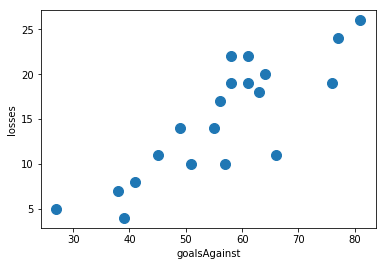

In [84]:
teams_pd.plot.scatter(x='goalsAgainst', y='losses', s=100)

In [86]:
del teams_pd['teamName']
teams_pd

,goalsAgainst,losses
0,27,5
1,38,7
2,39,4
3,41,8
4,51,10
5,45,11
6,49,14
7,57,10
8,66,11
9,55,14


In [87]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.00896249,  0.78860037],
       [ 2.82742869,  1.10404052],
       [ 2.90183471,  0.6308803 ],
       [ 3.05064675,  1.2617606 ],
       [ 3.79470693,  1.57720074],
       [ 3.34827082,  1.73492082],
       [ 3.64589489,  2.20808104],
       [ 4.24114304,  1.57720074],
       [ 4.91079721,  1.73492082],
       [ 4.092331  ,  2.20808104],
       [ 5.65485739,  2.99668141],
       [ 4.68757915,  2.83896134],
       [ 4.16673702,  2.68124127],
       [ 4.53876711,  2.99668141],
       [ 4.31554906,  2.99668141],
       [ 4.76198517,  3.15440149],
       [ 4.31554906,  3.46984164],
       [ 4.53876711,  3.46984164],
       [ 5.72926341,  3.78528179],
       [ 6.02688748,  4.10072194]])

In [88]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 4.95213388,  3.31212156],
        [ 2.69721816,  0.94632045],
        [ 4.02855442,  1.96023521]]),
 array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [89]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

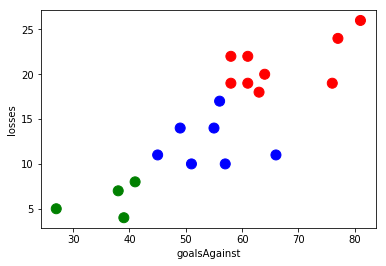

In [90]:
teams_pd.plot.scatter(x='goalsAgainst', y='losses', c=colors, s=100)

In [92]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 4.13697462,  1.86109688],
        [ 3.19945879,  1.49834071],
        [ 5.80366942,  3.62756171],
        [ 4.47499053,  3.08680717],
        [ 2.57940863,  0.84117373]]),
 array([4, 4, 4, 1, 0, 1, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2], dtype=int32))

In [93]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'm',
 'm',
 'g',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'b',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'y',
 'b',
 'b']

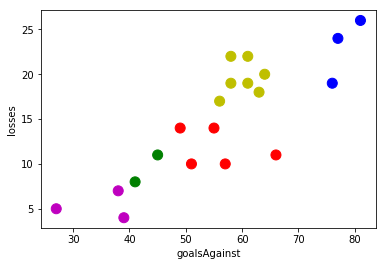

In [94]:
teams_pd.plot.scatter(x='goalsAgainst', y='losses', c=colors, s=100)